# Part II - (Prosper Loan Data)
## by (Charles Okafor)

## Investigation Overview


> For the presentation, I focused mainly on factors (variables) affecting BorrowerAPR and LoanStatus. I start by introducing the LoanStatus and CreditGrade variables, then showing the distribution of BorrowerAPR, BorrowerRate, LenderYield and ProsperScore. Then I showed the relationships between variables such as BorrowerAPR and LenderYield, BorrowerAPR and Term, ProsperRating_numeric and BorrowerAPR, ProsperRating_numeric and EstimatedLoss, EstimatedLoss and LoanStatus, LoanOriginationQuarter and BorrowerAPR, BorrowerState and BorrowerAPR, and finally Occupation and BorrowerAPR. Then I finally showed the multivariate relationships between some of these vairiables and how they impact on pr correlate with each other 


## Dataset Overview

> The data consists of information regarding 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The dataset can be found in the repository [here](https://www.google.com/url?q=https://www.google.com/url?q%3Dhttps://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv%26amp;sa%3DD%26amp;ust%3D1581581520570000&sa=D&source=editors&ust=1659457547284019&usg=AOvVaw2eUmmBQPwNU5rtelXPh3T2),
with feature documentation available [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
loandf = pd.read_csv('prosperLoanData.csv')
loandf.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Features of interest
features = ['CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment', 'LoanCurrentDaysDelinquent']
newdf = loandf.copy()

newdf = newdf[features]

In [4]:
# Replace missing data

newdf['CreditGrade'] = newdf['CreditGrade'].fillna('None')
newdf['GroupKey'] = newdf['GroupKey'].fillna('None')
newdf['Occupation'] = newdf['Occupation'].fillna('None')
newdf['ClosedDate'] = newdf['ClosedDate'].fillna('None')
newdf['EmploymentStatus'] = newdf['EmploymentStatus'].fillna('Not available')
newdf['BorrowerState'] = newdf['BorrowerState'].fillna('NA')
newdf['TotalProsperLoans'] = newdf['TotalProsperLoans'].fillna(0)
newdf['LoanFirstDefaultedCycleNumber'] = newdf['LoanFirstDefaultedCycleNumber'].fillna(0)
newdf['DebtToIncomeRatio'] = newdf['DebtToIncomeRatio'].fillna(0)
newdf['EmploymentStatusDuration'] = newdf['EmploymentStatusDuration'].fillna(0)
newdf['ProsperRating (numeric)'] = newdf['ProsperRating (numeric)'].fillna(0)
newdf['ProsperRating (Alpha)'] = newdf['ProsperRating (Alpha)'].fillna('0')
newdf['ProsperScore'] = newdf['ProsperScore'].fillna(0)
newdf['EstimatedEffectiveYield'] = newdf['EstimatedEffectiveYield'].fillna(0)
newdf['EstimatedLoss'] = newdf['EstimatedLoss'].fillna(0)
newdf['EstimatedReturn'] = newdf['EstimatedReturn'].fillna(0)

In [5]:
# Remove the rest of missing data

newdf = newdf[newdf['LoanStatus'].notna()]
newdf = newdf[newdf['BorrowerAPR'].notna()]

# Chamge the datatypes to the right formart

newdf.TotalProsperLoans = newdf.TotalProsperLoans.astype(int)
newdf.LoanFirstDefaultedCycleNumber = newdf.LoanFirstDefaultedCycleNumber.astype(int)
newdf.EmploymentStatusDuration = newdf.EmploymentStatusDuration.astype(int)
newdf.ProsperScore = newdf.ProsperScore.astype(int)
newdf['ProsperRating (numeric)'] = newdf['ProsperRating (numeric)'].astype(int)

In [6]:
# edit the column names and remove space and brackets 

newdf.columns = newdf.columns.str.replace(' ', '_')
newdf.columns = newdf.columns.str.replace('(', '')
newdf.columns = newdf.columns.str.replace(')', '')
newdf.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating_numeric',
       'ProsperRating_Alpha', 'ProsperScore', 'ListingCategory_numeric',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'GroupKey', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome',
       'TotalProsperLoans', 'LoanCurrentDaysDelinquent',
       'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination',
       'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter',
       'MonthlyLoanPayment', 'LoanCurrentDaysDelinquent'],
      dtype='object')

In [7]:
newdf.head()

,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,StatedMonthlyIncome,TotalProsperLoans,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LoanCurrentDaysDelinquent
0,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,0.00000,0.0000,0.00000,...,3083.333333,0,0,0,78,9425,2007-09-12 00:00:00,Q3 2007,330.43,0
1,None,36,Current,None,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,6125.000000,0,0,0,0,10000,2014-03-03 00:00:00,Q1 2014,318.93,0
2,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,0.00000,0.0000,0.00000,...,2083.333333,0,0,0,86,3001,2007-01-17 00:00:00,Q1 2007,123.32,0
3,None,36,Current,None,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,2875.000000,0,0,0,16,10000,2012-11-01 00:00:00,Q4 2012,321.45,0
4,None,36,Current,None,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,9583.333333,1,0,0,6,15000,2013-09-20 00:00:00,Q3 2013,563.97,0


## Visualization 1 - Distribution

> Here we are going to see the distributions of some of the variables of interest and how their bell-curve is shaped.


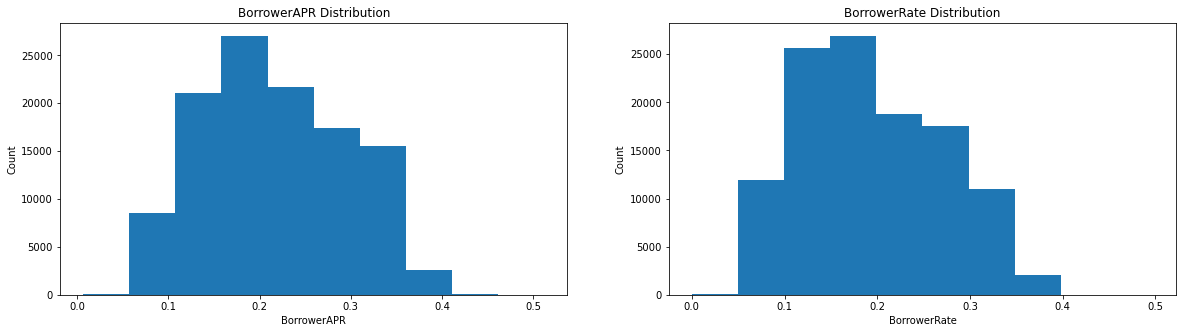

In [8]:
# Plot numerical data to show distribution
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1)
plt.hist(data = newdf, x = 'BorrowerAPR')
plt.title('BorrowerAPR Distribution')
plt.xlabel('BorrowerAPR')
plt.ylabel('Count');

plt.subplot(1, 2, 2)
plt.hist(data = newdf, x = 'BorrowerRate')
plt.title('BorrowerRate Distribution')
plt.xlabel('BorrowerRate')
plt.ylabel('Count');

Both `BorrowerAPR` and `BorrowerRate`seem to be normally distributed, though a little left-skewed which could be ignored for the purpose of this analysis.

## Visualization 2 - Bivariate Analysis

**Question:** What does the relationship between the 2 quantitative variables: `BorrowerAPR` and `LenderYield`, `Term` and `BorrowerAPR`, `ProsperRating_numeric`, and `EstimatedLoss` look like


Text(0.5, 1.0, 'BorrowerAPR vs LenderYield')

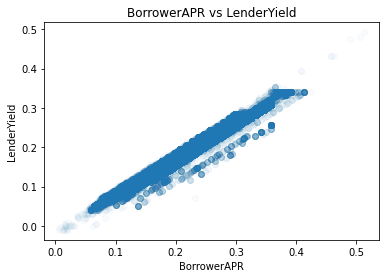

In [9]:
# Checking the relationship between BorrowerAPR and LenderYield

plt.scatter(data = newdf, x = 'BorrowerAPR', y = 'LenderYield', alpha = 1/40);
plt.xlabel('BorrowerAPR')
plt.ylabel('LenderYield')
plt.title('BorrowerAPR vs LenderYield')

The chart above shows the relationship between the `BorrowerAPR` and `LenderYield`. This significantly shows a linear relationship between the Interest rate and the Annual Percentage Rate.

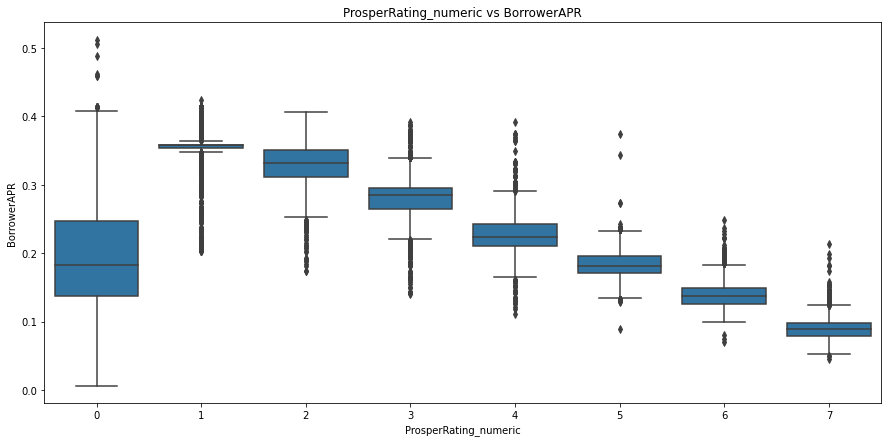

In [10]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [15, 7])
sb.boxplot(data = newdf, x = 'ProsperRating_numeric', y = 'BorrowerAPR', color = base_color)
plt.xlabel('ProsperRating_numeric')
plt.ylabel('BorrowerAPR')
plt.title('ProsperRating_numeric vs BorrowerAPR');

> The boxplot above shows how the APR is distributed for the different Prosper ratings. We can see a relatively high APR for ratings 1 and 2 and downward slope afterwards.


Now we will also show the relationship between `LoanStatus` and `EstimatedLoss` using both the **Violin Plot** and the **Box Plot** indicating quartile disrtibution of the `EstimatedLoss` across various `LoanStatus`

In [11]:
newdf.LoanStatus = newdf.LoanStatus.str.replace('(', '')
newdf.LoanStatus = newdf.LoanStatus.str.replace(')', '')

In [12]:
newdf.LoanStatus.value_counts()

Current                   56576
Completed                 38049
Chargedoff                11992
Defaulted                  5018
Past Due 1-15 days          806
Past Due 31-60 days         363
Past Due 61-90 days         313
Past Due 91-120 days        304
Past Due 16-30 days         265
FinalPaymentInProgress      205
Past Due >120 days           16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [13]:
Loan_status = ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due 1-15 days', 'Past Due 16-30 days', 'Past Due 31-60 days', 'Past Due 61-90 days', 'Past Due 91-120 days', 'Past Due >120 days', 'FinalPaymentInProgress', 'Cancelled']

loan_classes = pd.api.types.CategoricalDtype(ordered=True, categories=Loan_status)

newdf['LoanStatus'] = newdf['LoanStatus'].astype(loan_classes)

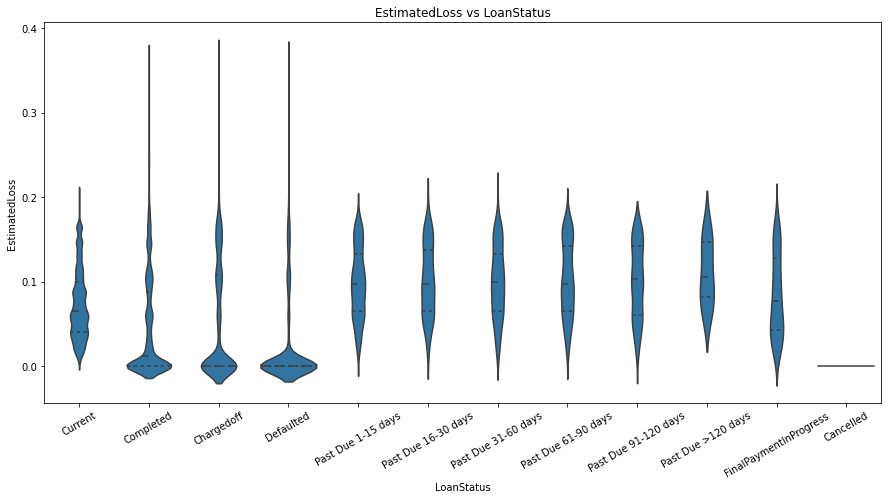

In [14]:
plt.figure(figsize = [15, 7]) 
base_color = sb.color_palette()[0]

ax = sb.violinplot(data=newdf, x='LoanStatus', y='EstimatedLoss', color=base_color, inner='quartile')
plt.xticks(rotation=30)
plt.title('EstimatedLoss vs LoanStatus');

From the above, we could see how the `EstimatedLoss` is distributed across the different loan status. We see low loss for loans Current, Completed and Chargedoff with a high spike for Defaulted loans. We can see that Estimated loss was minimal (closer to zero) for **Completed**, **Chargedoff**, and **Current** loans while Loans from **Defaulted** and above show high `EstimatedLoss`

## Visualization 3 - Multivariate Analysis

Here we will create plots of three or more variables to investigate your data even further. 

**Question:** What does the relationship between the 3 variables: `LoanStatus`, `LoanOriginalAmount`, and `CreditGrade` look like

In [15]:
newdf_2 = newdf.copy()

newdf_2 = newdf_2[newdf_2['CreditGrade'] != 'None']

newdf_2.CreditGrade.value_counts()

C     5646
D     5152
B     4387
HR    3506
AA    3495
A     3314
E     3288
NC     140
Name: CreditGrade, dtype: int64

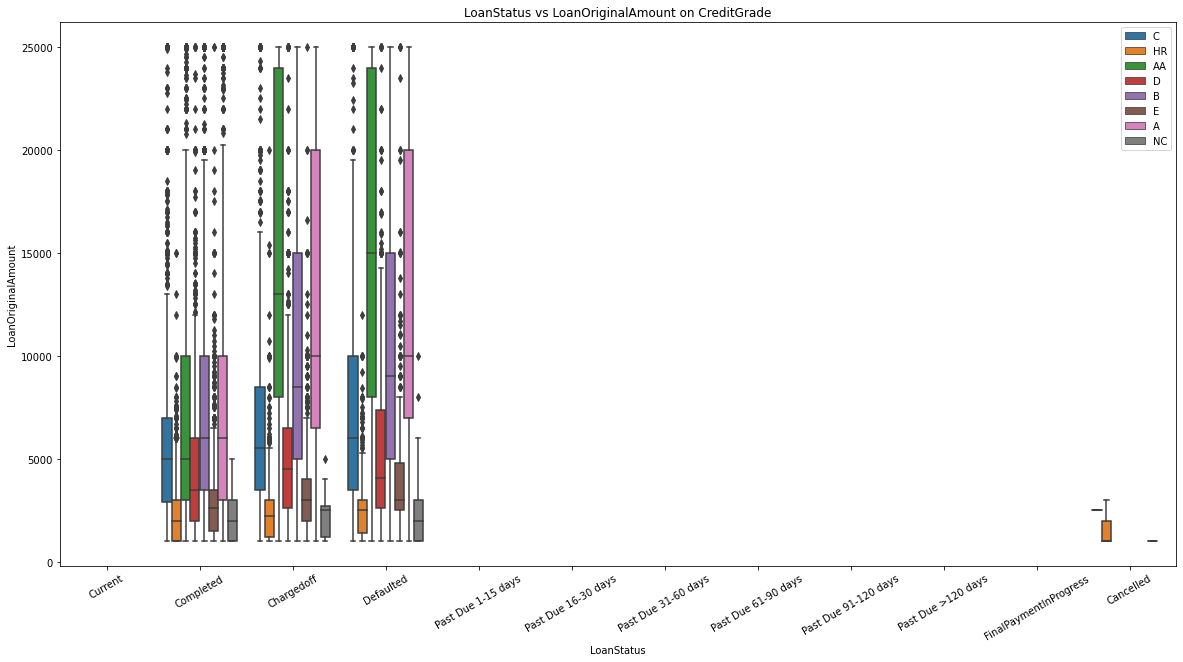

In [18]:
plt.figure(figsize = [20, 10])
sb.boxplot(data = newdf_2, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'CreditGrade')
plt.legend() 
plt.title('LoanStatus vs LoanOriginalAmount on CreditGrade')
plt.xticks(rotation = 30);

We can see a higher distribution of `LoanOriginalAmount` for `CreditGroup` **AA** and **A**, clustered around these `LoanStatus` **Completed**, **Chargedoff**, and **Defaulted** 

**Key Findings**

> The realtionship between `LoanStatus` and `LoanOriginalAmount` are skewed between `Comnpleted`, `Chargedoff` and `Defaulted` loans for most `CreditGrades`. Loans that have defaulted past a day does not show mapping of data `Cancelled` loans which shows a concentration of `HR` credit grade

## Conclusion

>Lots of the relationships between variables here are shown to be linear. Also these variables are mostly normally distributed with a few slightly skewed. This shows a very balanced relationship between borrowers and their attributes and their lending characteristics

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt